In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
import pandas as pd

from ai4ha.data.series.MITBIHDataLoader import MITBIHtrain
from ai4ha.data.series.KUHARDataLoader import KUHARtrain
from ai4ha.data.series.PTBXLDataLoader import PTBXLtrain
from ai4ha.data.series.ECGFeaturesDataset import ECGFeaturesDataset
from ai4ha.diffusion.models.unet_1d import UNet1DModel
# from data.UIDDataLoader import UIDtrain
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.manifold import TSNE
import os

from ai4ha.diffusion.pipelines.pipeline_ddpm_1d import DDPMPipeline
from ai4ha.util.plot import smooth_plot
from diffusers import DDPMScheduler
import seaborn as sns

In [ ]:
def last_samples(path):
    dirs = os.listdir(path)
    dirs = sorted([d for d in dirs if d.startswith("sampled_data")])
    return int(dirs[-1].split('.')[0].split('_')[-1])

In [ ]:
# orig = MITBIHtrain(filename="/home/bejar/ssdstorage/MITBIH/mitbih_test.csv",
#                    n_samples=100,
#                    oneD=True,
#                    resamp=False,
#                    fixsize=192)
# orig = KUHARtrain(filename="/home/bejar/bsc/Data/KU-HAR/KU-HAR.csv",
#                   padding=20)
# orig =PTBXLtrain(dir="/home/bejar/bsc/Data/ptbxl_c",
#                   padding=24)

orig = ECGFeaturesDataset(dir="/home/bejar/bsc/Data/ECG_features",
                            dataset="experiment_PTBXL_1dcnn_real_TrRTeR_full_PTBXLRhythm_features")

In [ ]:
odata = [d[0].squeeze() for d in orig]
datal = [int(d[1]) for d in orig]
sdata = np.array(odata)


In [ ]:
np.histogram(datal, bins=range(0, 12))

In [ ]:
sdata.shape

In [ ]:
orig[1][0].shape

In [ ]:
# np.max(dataset.X_train), np.min(dataset.X_train)

In [ ]:

model = 'ECG_PTBXL_CNN-b256-M-UNET1C-s384-l8-1244-r3-a1-te-positional-ce-embedding-3-DF-DDPM-t1000-b-4-2-linear-pt-sample-OPT-adamw-lr0.0001-SCcosine-w100-LS-L2'
# model = 'ECG_PTBXL-zero-b64-M-Transfusion-s1024-l2048-h8-r6-d0.1-f512-te-positional-DF-DDPM-t1000-b-4-2-linear-pt-sample-OPT-adamw-lr0.0001-SCcosine-w100-LS-L2'
# model = 'PTBXLC-zero-b128-M-UNET1C-s1024-l128-124-r2-a1-te-positional-ce-embedding-12-DF-DDPM-t1000-b-4-2-linear-pt-sample-OPT-adamw-lr4-LS-L2'
PATH = '/home/bejar/bsc/misiones/Series/Models/TimeDiffusion/logs/'
loss = pd.read_csv(f'{PATH}/{model}/logs/losslog.csv')
# loss.tail()

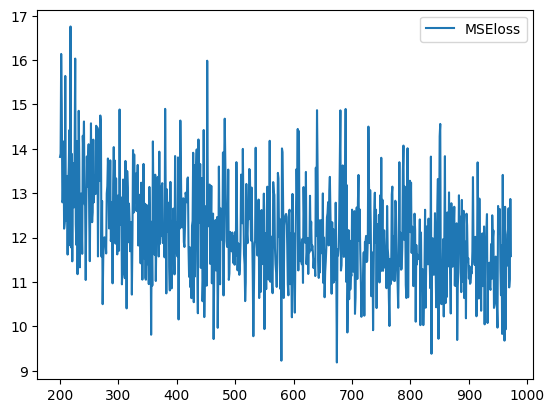

In [ ]:
loss.iloc[200:].plot(y=['MSEloss']);

In [ ]:
# PATH = '/home/bejar/PycharmProjects/misiones/Series/Models/Diffusers/logs/'
# SAMP= last_samples(f'{PATH}/{model}/samples')
# ldata = np.load(f'{PATH}/{model}/samples/sampled_data_{SAMP:05d}.npz',
#                 allow_pickle=True)
ldata = np.load(f'{PATH}/{model}/samples/sampled_data.npz',
                allow_pickle=True)
data = ldata['samples']
labels = ldata['classes']
# print(SAMP)
sel = data.squeeze()
sel.shape

(9984, 384)

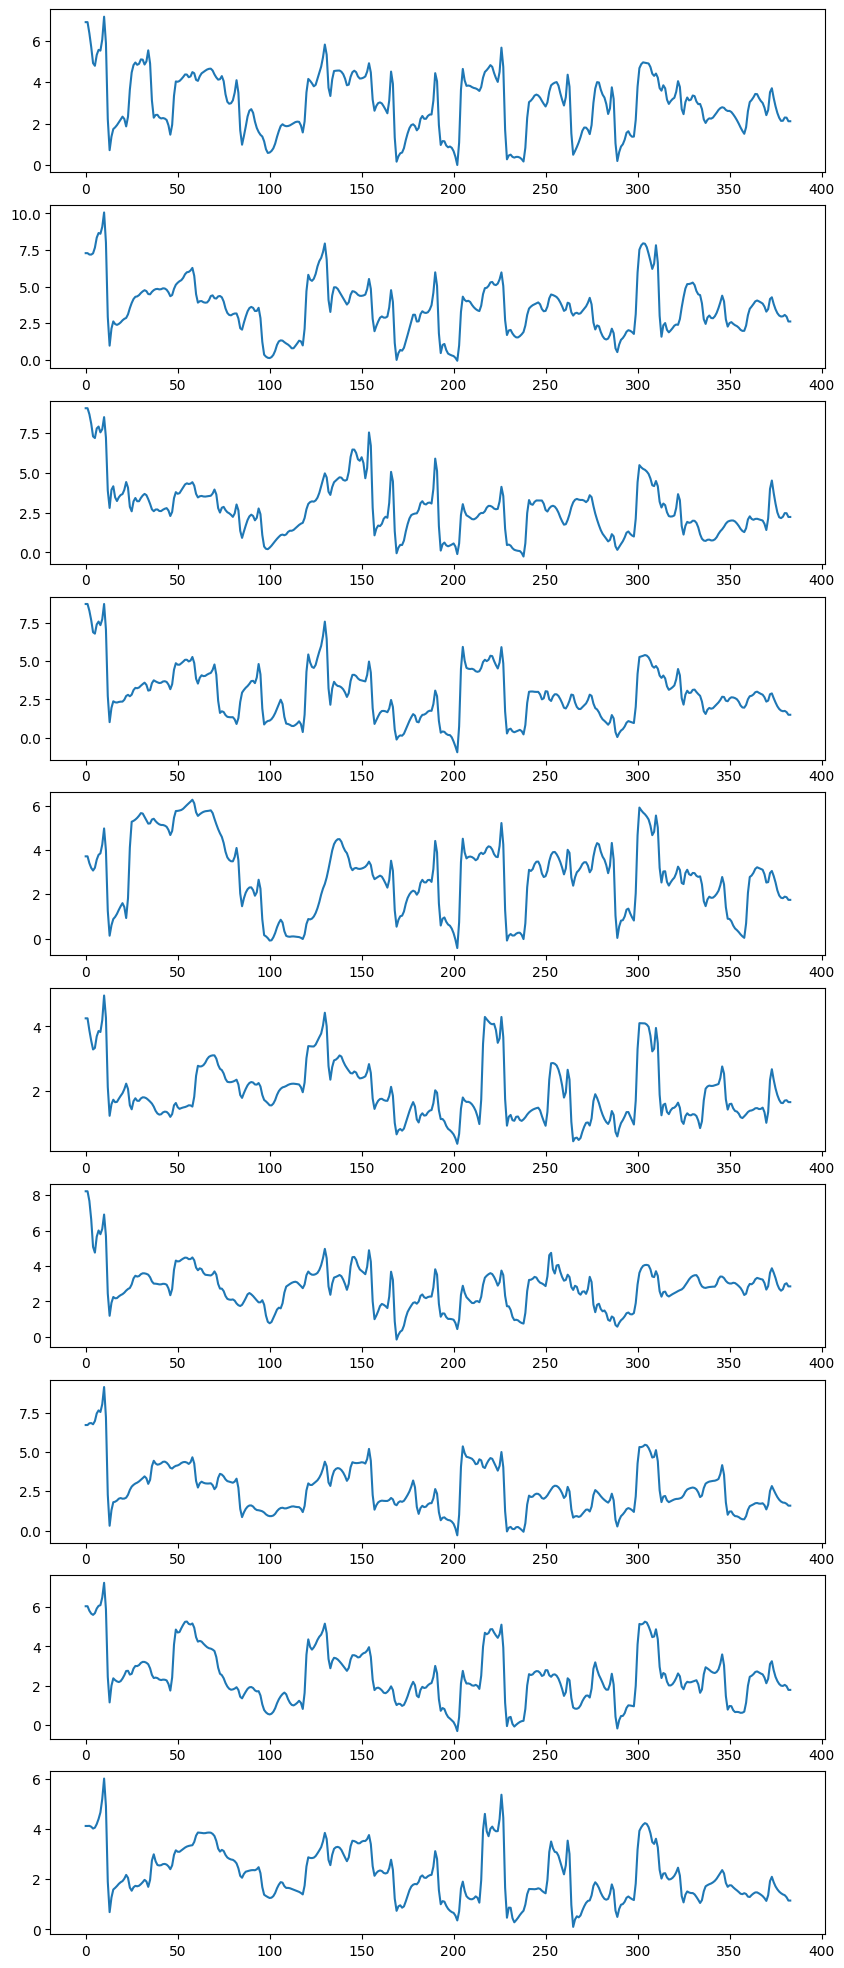

In [ ]:
ch = 1
ncl = 7
trunc = 1000
fig, ax = plt.subplots(10,1, figsize=(10,25))
ax = ax.flatten()
for i in range(10):
    # ax[i].plot(sel[i][ch][:trunc])
    ax[i].plot(sel[i][:trunc])

In [ ]:
# ch = 6
# ncl = 7
# trunc = 1000
# fig, ax = plt.subplots(ncl,1, figsize=(10,25))
# ax = ax.flatten()
# for i in range(ncl):
#     ax[i].plot(sel[i][ch][:trunc])
#     ax[i].set_title(f'{i}')
#     ax[i].plot(sel[i + ncl][ch][:trunc])
#     ax[i].set_title(f'{i}')
#     ax[i].plot(sel[i + (ncl*2)][ch][:trunc])
#     ax[i].set_title(f'{i}')
#     ax[i].plot(sel[i + (ncl*3)][ch][:trunc])
#     ax[i].set_title(f'{i}')

#     # ax[i].axis('off')


In [ ]:
# model = 'WaveGAN-KUHAR-G-LD512-ID10-IC64-K16-S2-IN-D-NL4-IC16-K16-S2-SF0-SN-GP01-local'
# modeltype = 'TimeDiffusion'
# PATH = f'/home/bejar/bsc/misiones/Series/Models/{modeltype}/logs/{model}/samples/'
# data = np.load(PATH + 'samples.npy')
# labels = np.load(PATH + 'labels.npy')

In [ ]:
sel.shape, labels.shape, sdata.shape

In [ ]:
# ch = 10
# fig = plt.figure(figsize=(10, 10))
# for i in range(1, 10):
#     fig.add_subplot(3, 3, i)
#     plt.plot(data[i,ch,:trunc])

In [ ]:
d=2
all = np.concatenate((sel, sdata), axis=0)
laball = np.concatenate((labels, np.array(datal)+10), axis=0)

In [ ]:
tsne = TSNE(n_components=2, perplexity=10, n_iter=2000,
            init='random').fit_transform(all)


In [ ]:
plt.scatter(tsne[data.shape[0]:, 0], tsne[data.shape[0]:, 1], c=datal, s=1, cmap='hsv');

In [ ]:
l = 6
plt.scatter(tsne[laball==l, 0], tsne[laball==l, 1], c=laball[laball==l], s=1, cmap='hsv');
plt.scatter(tsne[laball==l+10, 0], tsne[laball==l+10, 1], c='k', s=1, cmap='hsv');


In [ ]:
plt.scatter(tsne[data.shape[0]:, 0], tsne[data.shape[0]:, 1], c='k', s=1, cmap='viridis')
plt.scatter(tsne[:data.shape[0], 0], tsne[:data.shape[0], 1],c=labels.squeeze(),cmap='hsv', s=5, marker='x');

In [ ]:
1/0